# Notebook for the Capstone Project

In [1]:
#Import Libraries
import pandas as pd 
import numpy as np
from sklearn.utils import resample

print('Hello Capstone Project Course')

Hello Capstone Project Course


# Introduction/Business Problem 

- Business Problem: 
    - Accidents continue to block traffic and cause backups in the greater Seattle area.  In order to help alleviate the congestion during peak hours of travel we need to know what causes them in the first place.  


- Hypothesis/Thoughts: 
    - The date/time of day effects the amount of accidents that will occur
        - Independent Variable: Date/Time
    - The severity of an accident is determened by location and time
        - Independent Variable: Locaiton & Time
    
    
    New Hypothesis after extensive data exploration: Road Conditions are the influence in the severity of the accident when all things are equal; i.e. not considering drugs/alcohol etc. 


- Data Background: 
    - SDOT (Seattle Department of Transportation) Data 
    - Removed 5,639 of the 194,673 rows in the initial data set that were noted NEI (Not enough Information or Insufficient Location Information)
    - Data can be found via GitHub URL with the metadata descriptions.  
    - Date Time cannot be used to predict severity due to the inconsistency of the data entered
    - Severity Code & Severity Code Definitions:
        - 0: Little to no Probability (Clear Conditions)
        - 1: Very Low Probability — Chance or Property Damage
        - 2: Low Probability — Chance of Injury
        - 3: Mild Probability — Chance of Serious Injury
        - 4: High Probability — Chance of Fatality

In [2]:
data = pd.read_csv('SDOT_Collisions.csv')

In [3]:
data.describe()

,OBJECTID,INTKEY,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,57902.000000,21093.000000,57902.000000,57901.000000,57901.000000,57901.000000,57901.000000,57901.000000,4.114000e+03,57901.000000,57901.000000
mean,152805.291821,39702.077419,1.338088,2.300116,0.063039,0.039792,1.866341,14.404881,1.149306e+07,476.019015,28179.457211
std,35121.399719,60018.198383,0.473063,1.466764,0.254422,0.197231,0.698291,7.046695,1.941865e+06,4636.402183,118954.946292
min,1.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.137016e+06,0.000000,0.000000
25%,139877.250000,28734.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,1.024851e+07,0.000000,0.000000
50%,157228.000000,30056.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,1.225201e+07,0.000000,0.000000
75%,175916.750000,34111.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.303002e+07,0.000000,0.000000
max,193731.000000,673471.000000,2.000000,54.000000,4.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,701280.000000


In [4]:
data.head()

,OBJECTID,ADDRTYPE,INTKEY,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,1,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,2,Injury Collision,Angles,2.0,0.0,0.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0.0,0.0,N
1,4,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,1,Property Damage Only Collision,Other,3.0,0.0,0.0,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0.0,0.0,N
2,6,Intersection,36974.0,24TH AVE NW AND NW 85TH ST,1,Property Damage Only Collision,Angles,2.0,0.0,0.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0.0,0.0,N
3,9,Intersection,29745.0,BROADWAY AND E PIKE ST,2,Injury Collision,Cycles,3.0,0.0,1.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855.0,0.0,N
4,16,Block,NaN,SW SPOKANE ST BETWEEN SW SPOKANE W BR AND TERM...,1,Property Damage Only Collision,Rear Ended,0.0,0.0,0.0,...,Wet,Dark - Street Lights On,NaN,3137016.0,NaN,14,From same direction - both going straight - on...,0.0,0.0,N


#### Check Unique Values

In [5]:
data['SEVERITYCODE'].value_counts()

1    38326
2    19576
Name: SEVERITYCODE, dtype: int64

In [6]:
data['WEATHER'].value_counts()

Clear                       34079
Raining                     10204
Overcast                     7995
Unknown                      2725
Fog/Smog/Smoke                237
Snowing                       182
Other                         141
Sleet/Hail/Freezing Rain       22
Blowing Sand/Dirt               9
Severe Crosswind                8
Name: WEATHER, dtype: int64

In [7]:
data['ROADCOND'].value_counts()

Dry               37876
Wet               14481
Unknown            2806
Snow/Slush          209
Ice                 189
Other                31
Standing Water       27
Oil                  15
Sand/Mud/Dirt        14
Name: ROADCOND, dtype: int64

In [8]:
data['LIGHTCOND'].value_counts()

Daylight                    35235
Dark - Street Lights On     14430
Unknown                      2488
Dusk                         1675
Dawn                          839
Dark - No Street Lights       431
Dark - Street Lights Off      373
Other                          57
Dark - Unknown Lighting         1
Name: LIGHTCOND, dtype: int64

In [9]:
data['SPEEDING'].value_counts()

Y    2222
Name: SPEEDING, dtype: int64

#### Evening the sample size out 

In [10]:
df_major = data[data.SEVERITYCODE == 1]
df_minor = data[data.SEVERITYCODE == 2]

df_smpl = resample(df_major, replace=False, n_samples = 19576, random_state=123)
df = pd.concat([df_smpl,df_minor])

df['SEVERITYCODE'].value_counts()

2    19576
1    19576
Name: SEVERITYCODE, dtype: int64

#### Converting fields to category then labeling  

In [11]:
df = df.astype({"WEATHER":'category', "ROADCOND":'category', "LIGHTCOND":'category'})
df.head()

,OBJECTID,ADDRTYPE,INTKEY,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
21048,147425,Block,NaN,MERCER SR ST BETWEEN WESTLAKE AVE N AND TERRY ...,1,Property Damage Only Collision,Rear Ended,2.0,0.0,0.0,...,Unknown,Unknown,NaN,NaN,NaN,14,From same direction - both going straight - on...,0.0,0.0,N
51253,185270,Block,NaN,UNION ST BETWEEN 7TH AVE AND CONVENTION PL,1,Property Damage Only Collision,Sideswipe,2.0,0.0,0.0,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0.0,0.0,N
26727,153893,Block,NaN,24TH AVE NW BETWEEN NW 56TH ST AND NW 57TH ST,1,Property Damage Only Collision,Sideswipe,2.0,0.0,0.0,...,Dry,Daylight,NaN,NaN,NaN,12,From same direction - both going straight - on...,0.0,0.0,N
56488,191822,Block,NaN,W NICKERSON ST BETWEEN W BERTONA ST AND 3RD AVE W,1,Property Damage Only Collision,Other,1.0,0.0,0.0,...,Dry,Daylight,NaN,NaN,NaN,50,Fixed object,0.0,0.0,N
22942,149529,Block,NaN,ALASKAN WY VI NB BETWEEN SENECA ST OFF RP AND ...,1,Property Damage Only Collision,Sideswipe,7.0,0.0,0.0,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0.0,0.0,N


In [12]:
df["WEATHER_c"] = df["WEATHER"].cat.codes
df["ROADCOND_c"] = df["ROADCOND"].cat.codes
df["LIGHTCOND_c"] = df["LIGHTCOND"].cat.codes
Feature = df[['WEATHER','ROADCOND','LIGHTCOND','WEATHER_c','ROADCOND_c','LIGHTCOND_c']]
X = np.asarray(Feature[['WEATHER_c','ROADCOND_c','LIGHTCOND_c']])

In [13]:
Feature.head()

,WEATHER,ROADCOND,LIGHTCOND,WEATHER_c,ROADCOND_c,LIGHTCOND_c
21048,Unknown,Unknown,Unknown,9,7,8
51253,Clear,Dry,Daylight,1,0,5
26727,Clear,Dry,Daylight,1,0,5
56488,Clear,Dry,Daylight,1,0,5
22942,Clear,Dry,Dark - Street Lights On,1,0,2


In [14]:
y = df['SEVERITYCODE'].values
y[0:]

array([1, 1, 1, ..., 2, 2, 2])

### Building The Models

In [15]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 2.96389979,  1.29536099,  2.11653393],
       [-0.63096252, -0.63829668,  0.49414937],
       [-0.63096252, -0.63829668,  0.49414937],
       ...,
       [-0.63096252, -0.63829668,  0.49414937],
       [ 0.71711085,  1.5715978 ,  0.49414937],
       [ 1.16646864,  1.5715978 ,  0.49414937]])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print('Test set shape: ', X_test.shape, y_test.shape)
print('Training set shape: ', X_train.shape, y_train.shape)

Test set shape:  (11746, 3) (11746,)
Training set shape:  (27406, 3) (27406,)


#### K Nearest Neighbor(KNN)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
k = 20
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh_pred = neigh.predict(X_test)
neigh_pred[0:]

array([1, 2, 1, ..., 1, 2, 1])

In [18]:
from sklearn.metrics import f1_score, jaccard_similarity_score, log_loss
print('KNN F1-Score: ', f1_score(y_test, neigh_pred, average='macro'))
print('KNN Jaccard Score: ', jaccard_similarity_score(y_test, neigh_pred))

KNN F1-Score:  0.4728902430702581
KNN Jaccard Score:  0.5107270560190703


#### Support Vector Machine (SVM) 

In [19]:
from sklearn import svm
y_train = y_train.astype(float)
s_svm = svm.LinearSVC(random_state=7)
s_svm.fit(X_train, y_train)  

y_pred=s_svm.predict(X_train)

In [20]:
print('SVM F1-Score is: ',f1_score(y_train, y_pred, average='weighted'))
print('SVM Jaccard Score is: ',jaccard_similarity_score(y_train, y_pred))

SVM F1-Score is:  0.4989861091715683
SVM Jaccard Score is:  0.5132817631175655


#### Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',max_depth = 6)
tree.fit(X_train, y_train)
ptree = tree.predict(X_test)
ptree[0:]

array([2., 2., 2., ..., 2., 2., 2.])

In [22]:
print('Decision Tree F1-Score: ', f1_score(y_test, ptree, average='macro'))
print('Decision Tree Jaccard Score: ', jaccard_similarity_score(y_test,ptree))

Decision Tree F1-Score:  0.5163454320970454
Decision Tree Jaccard Score:  0.5425676826153584


#### Log Regression 

In [23]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LRPe = LR.predict(X_test)
LRP = LR.predict_proba(X_test)
LRPe[0:]

array([2., 1., 2., ..., 2., 1., 2.])

In [24]:
print('Logistic Regression F1-Score is: ', f1_score(y_test, LRPe, average='macro'))
print('Logistic Regression Jaccard Score is: ', jaccard_similarity_score(y_test, LRPe))
print('Logistic Regression LogLoss is: ', log_loss(y_test, LRP))

Logistic Regression F1-Score is:  0.49770236079637964
Logistic Regression Jaccard Score is:  0.512004086497531
Logistic Regression LogLoss is:  0.6902841320777876


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[2016 3871]
 [1861 3998]]


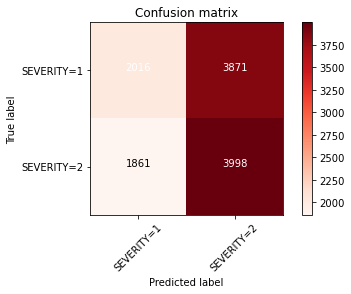

In [26]:
cnf_matrix = confusion_matrix(y_test, LRPe, labels=[1,2])
np.set_printoptions(precision=2)

# Non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['SEVERITY=1','SEVERITY=2'],normalize= False,  title='Confusion matrix')

In [27]:
print(classification_report(y_test, LRPe))

              precision    recall  f1-score   support

           1       0.52      0.34      0.41      5887
           2       0.51      0.68      0.58      5859

   micro avg       0.51      0.51      0.51     11746
   macro avg       0.51      0.51      0.50     11746
weighted avg       0.51      0.51      0.50     11746



In [28]:
# F1-Scores
print('KNN F1-Score: ', f1_score(y_test, neigh_pred, average='macro'))
print('Decision Tree F1-Score: ', f1_score(y_test, ptree, average='macro'))
print('Logistic Regression F1-Score is: ', f1_score(y_test, LRPe, average='macro'))
print('SVM F1-Score is: ',f1_score(y_train, y_pred, average='weighted'))

KNN F1-Score:  0.4728902430702581
Decision Tree F1-Score:  0.5163454320970454
Logistic Regression F1-Score is:  0.49770236079637964
SVM F1-Score is:  0.4989861091715683


In [29]:
# Jaccard Scores 
print('KNN Jaccard Score: ', jaccard_similarity_score(y_test, neigh_pred))
print('Decision Tree Jaccard Score: ', jaccard_similarity_score(y_test,ptree))
print('Logistic Regression Jaccard Score is: ', jaccard_similarity_score(y_test, LRPe))
print('SVM Jaccard Score is: ',jaccard_similarity_score(y_train, y_pred),'\n')
# Log Loss Score
print('Logistic Regression LogLoss is: ', log_loss(y_test, LRP))

KNN Jaccard Score:  0.5107270560190703
Decision Tree Jaccard Score:  0.5425676826153584
Logistic Regression Jaccard Score is:  0.512004086497531
SVM Jaccard Score is:  0.5132817631175655 

Logistic Regression LogLoss is:  0.6902841320777876


#### Based off of the testing done, the decision tree is the best model to test the data with.  

### Findings - After testing the historical data provided by Seattle Departement of Transportation, we were not able to find if the time of day played a factor in the severity of an accident due to the data that was entered.  However, we did find that weather, light and road conditions have an impact on the severity of an accident; either class 1 - Property Damage or class 2 - Injury.  